# Microéconomie 5
## TD5 : Marché de droits à polluer

### Exercice 1

On considère une économie avec deux biens : le numéraire (bien 1, prix supposé égal à 1) et les droits à polluer (bien 2, en quantité totale $N$, prix $p$). Les dotations initiales en bien 1 sont $\omega^A_1 = 6$ et $\omega^B_1 = 4$. Les agents ont les préférences

\begin{aligned}
    U^A(x^A) &= \ln(x_2^A) + x_1^A \\
    U^B(x^B) &= \ln(x_2^B) + x_1^B.
\end{aligned}

On va s'intéresser à ce qui se passe quand on distribue les droits (le bien 2) différemment aux agents $A$ et $B$. Par exemple, on peut choisir de donner initialement tous les droits à $A$, c'est-à-dire de choisir les allocations initiales $\omega^A_2 = N$ et $\omega^B_2 = 0$ ; ou à l'inverse, de tous les donner à $B$, c'est-à-dire $\omega^A_2 = 0$ et $\omega^B_2 = N$.
    
Le code suivant commence par définir ces données du problème. On choisit par exemple $N = 12$ et on commence par le cas où $A$ possède tous les droits au départ.

**Dans le code ci-dessous, vous pouvez modifier librement la quantité totale de droits $N$, ou les allocations initiales en bien 1 $\omega^A_1$ et $\omega^B_1$ pour voir comment cela affecte les résultats.**

In [1]:
N <- 10                                                  # quantité totale de droits à polluer
omegaA <- c(6, N)                                        # dotation initiale de A
omegaB <- c(4, N - omegaA[2])                            # dotation initiale de B
omega1 <- omegaA[1] + omegaB[1]                          # dotation totale en bien 1
omega2 <- omegaA[2] + omegaB[2]                          # dotation totale en bien 2
UA <- function(x1, x2) log(x2) + x1                      # fonction d'utilité de A
UB <- function(x1, x2) log(x2) + x1                      # fonction d'utilité de B

Traçons tout d'abord les courbes d'indifférence (A en bleu, B en orange).

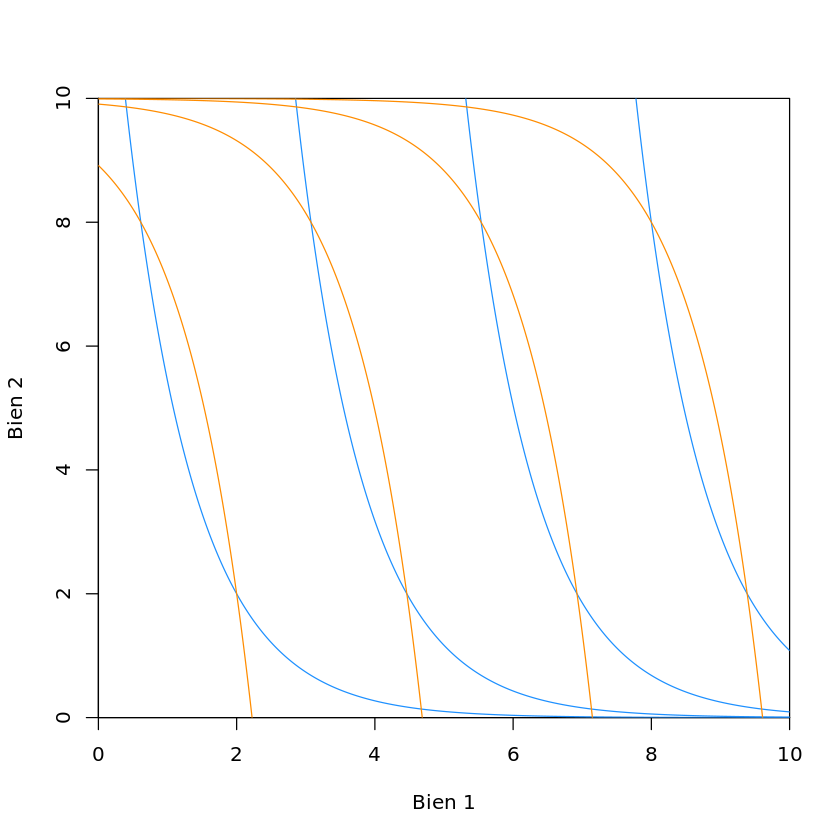

In [2]:
x1 <- seq(0, omega1, length=1000)

indiffA <- function(U) exp(U - x1)
indiffB <- function(U) exp(U - x1)

niveauxA <- seq(UA(omega1/5, omega2/5), UA(4*omega1/5, 4*omega2/5), len = 4)
niveauxB <- seq(UB(omega1/5, omega2/5), UB(4*omega1/5, 4*omega2/5), len = 4)

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, omega2))                # CI de A
for (U in niveauxB) lines(x1, rev(omega2 - indiffB(U)), col = "darkorange", ylim = c(0, omega2))  # CI de B

On cherche premièrement l'**équilibre concurrentiel** de cette économie quand $A$ dispose initialement de l'ensemble des droits : $\omega^A_2 = N$. Ici je m'intéresse juste au cas où l'équilibre est **interne**.

Dans ce cas, en l'absence d'externalités, l'égalité suivante est vérifiée à l'équilibre concurrentiel :

\begin{equation}
    \mathsf{TMS}^A = \mathsf{TMS}^B = \frac{p_1}{p_2} \iff x^A_2 = x^B_2 = \frac{1}{p}.
\end{equation}

L'équilibre du marché de bien 2 s'écrit donc

\begin{equation}
    \underbrace{x^A_2}_{=\frac{1}{p}} + \underbrace{x^B_2}_{=\frac{1}{p}} = \underbrace{\omega_2}_{= N} \iff p = \frac{2}{N}
\end{equation}

et fournit ainsi le prix d'équilibre des droits à polluer.

Grâce aux contraintes de budget de chaque agent, on en déduit l'équilibre en fonction des allocations initiales :

\begin{equation}
    \boxed{
    p = \frac{2}{N}
    \qquad
    x_2^A = x_2^B = \frac{N}{2}
    \qquad
    x_1^A = \omega_1^A + \frac{2}{N} \omega_2^A - 1
    \qquad
    x_1^B = \omega_1^B + \frac{2}{N} \omega_2^B - 1
    }.
\end{equation}

Notons bien que **ces formules restent valables uniquement tant que les allocations $x_1^A$ et $x_1^B$ obtenues sont positives**, c'est-à-dire tant que l'équilibre reste interne.

Si, comme on l'a supposé ici, $A$ possède initialement tous les droits (i.e. $\omega_2^A = N$) alors l'allocation d'équilibre en numéraire est

\begin{equation}
    x_1^A = \omega_1^A + 2 - 1 = 7
    \qquad
    x_1^B = \omega_1^B + 0 - 1 = 3
\end{equation}

c'est-à-dire que $B$ a échangé 1 unité de numéraire à $A$ contre la moitié de ses droits ($p \times \frac{N}{2} = 1$).

Représentons cet équilibre dans la boîte d'Edgeworth.

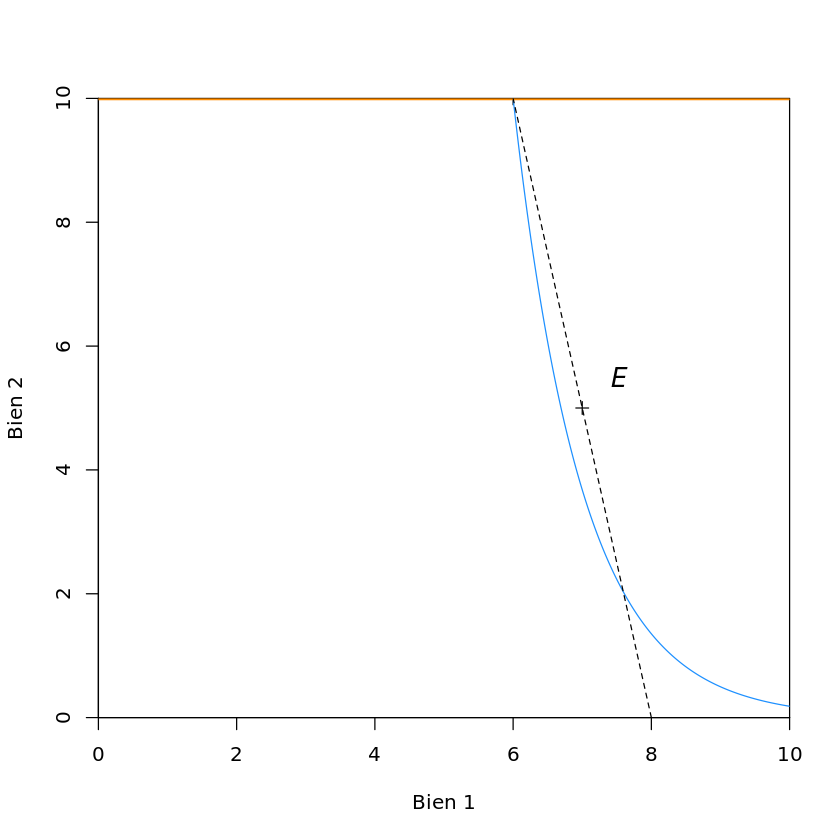

In [3]:
# Prix et allocation d'équilibre

p <- 2/N
x1A <- omegaA[1] + p*omegaA[2] - 1
x2A <- N/2
x1B <- omegaB[1] + p*omegaB[2] - 1
x2B <- N/2


# Allocation initiale et allocation d'équilibre

I <- omegaA
E <- c(x1A, x2A)


# Graphe

x2 <- seq(0, omega2, length=1000)
plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                    # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))    # indifférence de A
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2), lwd=3) # ind. B
lines(omegaA[1] + p*omegaA[2] - p*x2, x2, lty = 2)                               # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                      # équilibre concurrentiel E
    text(E[1]+.05*omega1, E[2]+.05*omega2, labels = "E", cex = 1.3, font = 3)

On remarque qu'ici la courbe d'indifférence de $B$ correspond à toutes les allocations où $x_2^B = 0$ ($B$ y obtient l'utilité $-\infty$).

Un calcul rapide montrerait que les optima de Pareto internes sont tels que $x_2^A = x_2^B = \frac{N}{2}$ et $x_1^A + x_1^B = \omega_1$, c'est-à-dire que les droits y sont distribués également entre $A$ et $B$, et $x_1^A + x_1^B = \omega_1$, c'est-à-dire que tous le bien 1 est alloué.

L'allocation d'équilibre trouvée ci-dessus correspond donc bien à un optimum de Pareto.

Pour s'en convaincre, je représente la courbe des optima intérieurs ci-dessous dans la boîte d'Edgeworth (en violet).

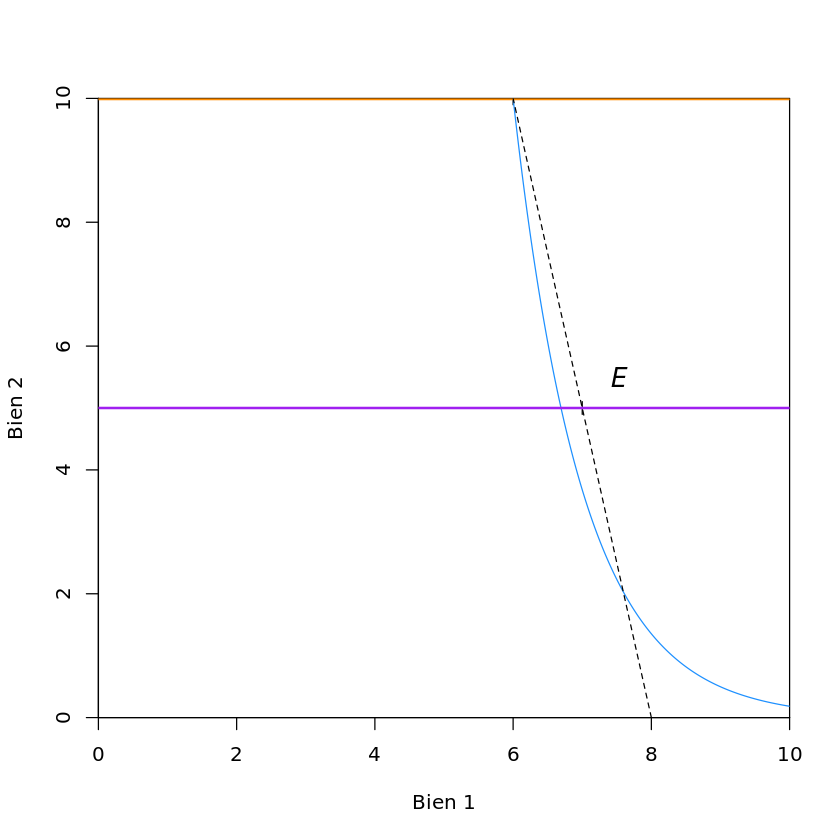

In [4]:
plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                      # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))      # indifférence de A
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2), lwd=3) # ind. B
lines(omegaA[1] + p*omegaA[2] - p*x1, x1, lty = 2)                               # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                        # équilibre concurrentiel E
    text(E[1]+.05*omega1, E[2]+.05*omega2, labels = "E", cex = 1.3, font = 3)
lines(c(0, omega1), c(N/2, N/2), lwd = 2, col = "purple")                        # optima internes

Supposons maintenant que les droits sont initialiement alloués en totalité à $B$ : $\omega^A_2 = 0$ et $\omega^B_2 = N$. La seule différence entre le nouvel équilibre et le précédent (quand on avait alloué tous les droits à $A$) est l'allocation d'équilibre en bien 1,

\begin{equation}
    x_1^A = \omega_1^A + 0 - 1 = 5
    \qquad
    x_1^B = \omega_1^B + 2 - 1 = 5.
\end{equation}

Cette fois, c'est $A$ qui a échangé 1 unité de numéraire à $B$ contre la moitié de ses droits. 

Je représente ce nouvel équilibre ci-dessous.

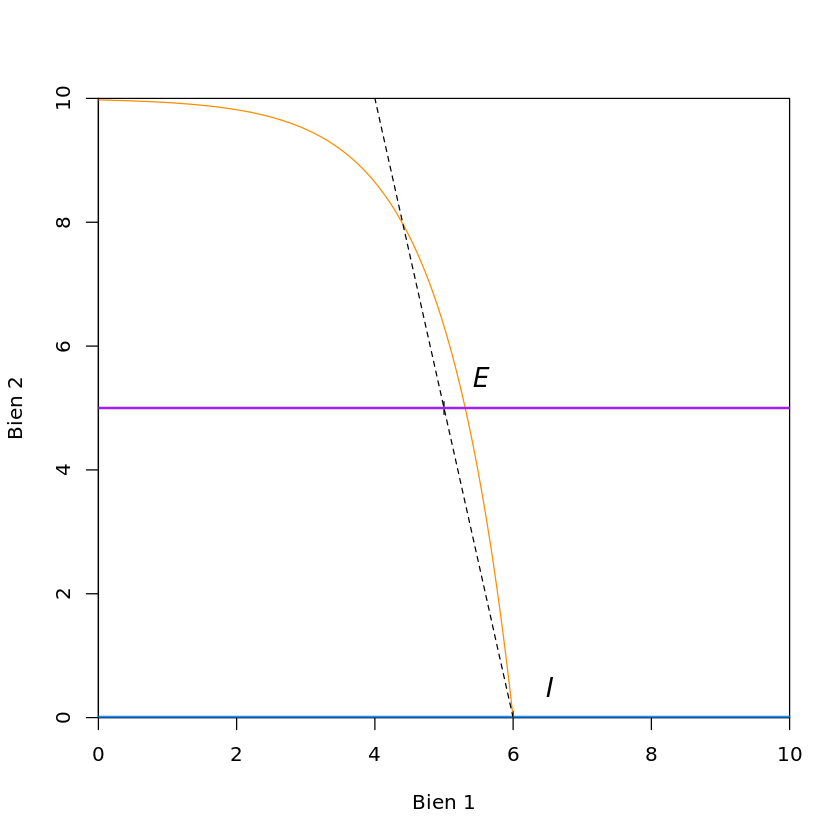

In [5]:
# Nouvelles allocations initiales

omegaA <- c(6, 0)
omegaB <- c(4, N)


# Prix et allocation d'équilibre

p <- 2/N
x1A <- omegaA[1] + p*omegaA[2] - 1
x2A <- N/2
x1B <- omegaB[1] + p*omegaB[2] - 1
x2B <- N/2


# Allocation initiale et allocation d'équilibre

I <- omegaA
E <- c(x1A, x2A)


# Graphe

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                      # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2), lwd=3)# indifférence de A
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # ind. B
lines(omegaA[1] + p*omegaA[2] - p*x1, x1, lty = 2)                               # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                        # équilibre concurrentiel E
    text(E[1]+.05*omega1, E[2]+.05*omega2, labels = "E", cex = 1.3, font = 3)
lines(c(0, omega1), c(N/2, N/2), lwd = 2, col = "purple")                        # optima internes

On retombe de nouveau sur un équilibre où les agents se partagent les droits de façon égale à l'équilibre. Ceci est une conséquence de la nature des préférences des agents : leurs fonctions d'utilité sont quasi-linéaire, ce qui entraîne une absence d'effet revenu dans leur demande en bien 2 (tant que la solution reste intérieure).

Peu importe l'allocation de départ, à l'équilibre ils conserveront toujours une part identique de bien 2. 

Finalement, que se passe-t-il si le régulateur augmente la quantité de droits à polluer $N$ ? Nous pouvons faire plusieurs commentaires.

- Le prix d'équilibre $p = \frac{2}{N}$ augmente. Ceci est cohérent avec l'idée que les droits deviennent moins rares, et donc moins chers, quand $N$ augmente.

- Les droits sont toujours partagés moitié-moitié à l'équilibre. En effet, les résultats ci-dessus ne dépendent pas de la valeur de $N$ choisie.

- Les allocations d'équilibre en bien 1 ne sont pas modifiées par une augmentation de $N$, tant que chaque agent conserve la même part relative de l'ensemble des droits (c'est-à-dire une fraction constante de $N$). En effet, le prix d'équilibre des droits diminue de telle sorte que la moitié des droits $\frac{N}{2}$ aura toujours la même valeur qu'une unité de numéraire.

Illustrons ceci en représentant l'équilibre quand $A$ commence avec tous les droits mais que l'on a doublé la valeur de $N$.

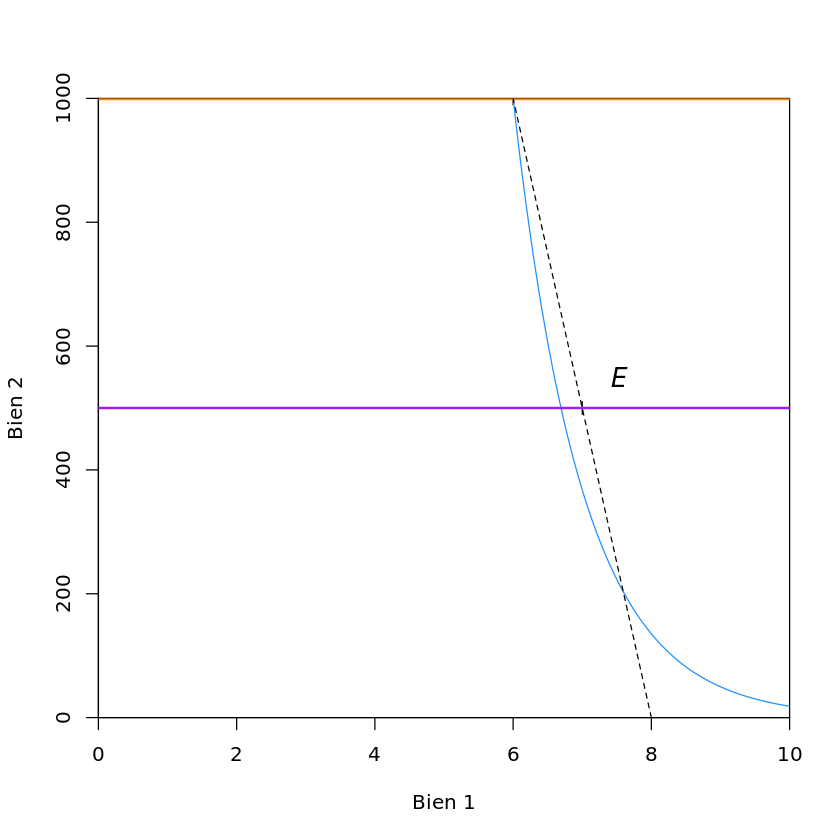

In [8]:
M <- 100*N                                                 # nouvelle quantité totale de droits
omegaA <- c(6, M)                                        # dotation initiale de A
omegaB <- c(4, M - omegaA[2])                            # dotation initiale de B
omega1 <- omegaA[1] + omegaB[1]                          # dotation totale en bien 1
omega2 <- omegaA[2] + omegaB[2]                          # dotation totale en bien 2


# Prix et allocation d'équilibre

p <- 2/M
x1A <- omegaA[1] + p*omegaA[2] - 1
x2A <- M/2
x1B <- omegaB[1] + p*omegaB[2] - 1
x2B <- M/2


# Allocation initiale et allocation d'équilibre

I <- omegaA
E <- c(x1A, x2A)


# Graphe

x2 <- seq(0, omega2, length=1000)
plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                    # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))    # indifférence de A
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2), lwd=3) # ind. B
lines(omegaA[1] + p*omegaA[2] - p*x2, x2, lty = 2)                               # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                      # équilibre concurrentiel E
    text(E[1]+.05*omega1, E[2]+.05*omega2, labels = "E", cex = 1.3, font = 3)
lines(c(0, omega1), c(M/2, M/2), lwd = 2, col = "purple")                        # optima internes

On constate que ce graphe est identique à celui trouvé plus haut (quand tous les droits étaient alloués à $A$), bien que l'on ait doublé la valeur de $N$ !